In [1]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy as np

my_example_nc_file = '/Users/⁨brownscholar/Desktop/Bridge Up Year/Climate Change Final Week⁩/mystery_file.nc'
ds = Dataset(r'mystery_file.nc')


In [2]:
print(ds) 

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.6
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    cdm_data_type: Grid
    comment: Sea Surface Height measured by Altimetry and derived variables
    contact: servicedesk.cmems@mercator-ocean.eu
    creator_email: servicedesk.cmems@mercator-ocean.eu
    creator_name: CMEMS - Sea Level Thematic Assembly Center
    creator_url: http://marine.copernicus.eu
    date_created: 2018-10-25T08:03:12Z
    date_issued: 2018-10-25T08:03:12Z
    date_modified: 2018-10-25T08:03:12Z
    geospatial_lat_max: 50.375
    geospatial_lat_min: 20.625
    geospatial_lat_resolution: 0.25
    geospatial_lat_units: degrees_north
    geospatial_lon_max: -39.625
    geospatial_lon_min: -90.625
    geospatial_lon_resolution: 0.25
    geospatial_lon_units: degrees_east
    geospatial_vertical_max: 0.0
    geospatial_vertical_min: 0.0
    geospatial_vertical_positive: down
    geospatia

In [3]:
sla = ds.variables['sla'][:]
time = ds.variables['time'][:]
lat = ds.variables['latitude'][:]
lon = ds.variables['longitude'][:]

In [4]:
# Get some parameters for the Stereographic Projection
lon_0 = lon.mean()
lat_0 = lat.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)


In [5]:
lons, lats = np.meshgrid(lon, lat)
xi, yi = m(lons, lats)


In [6]:
print(xi,yi)

[[-213139.43582846 -186271.63358942 -159411.53606771 ... 5159411.53606771
  5186271.63358943 5213139.43582846]
 [-206893.46018642 -180092.15279354 -153298.39043292 ... 5153298.39043293
  5180092.15279355 5206893.46018642]
 [-200628.36152259 -173893.73105598 -147166.48613666 ... 5147166.48613666
  5173893.73105599 5200628.36152259]
 ...
 [ 656419.80483145  674236.25471018  692060.72619256 ... 4307939.27380745
  4325763.74528983 4343580.19516855]
 [ 665189.89687357  682917.17206797  700652.56170925 ... 4299347.43829075
  4317082.82793203 4334810.10312644]
 [ 673985.87638595  691623.75609141  709269.84206184 ... 4290730.15793816
  4308376.2439086  4326014.12361405]] [[ 377882.85010988  372077.23573996  366333.69415363 ...  366333.69415363
   372077.23573996  377882.85010988]
 [ 406582.89417896  400769.09224907  395017.43082576 ...  395017.43082576
   400769.09224907  406582.89417896]
 [ 435259.32593947  429437.49471453  423677.86991139 ...  423677.86991139
   429437.49471453  435259.32593

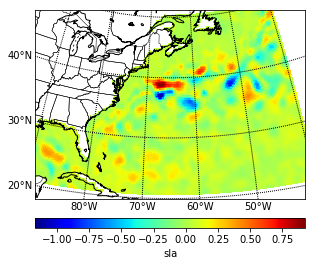

In [13]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(sla[0,:,:]), cmap ="jet")

                           
# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label('sla')

# Add Title
#plt.title('Sea Level Anomalies')
#plt.show()